# Explore here

# Análisis exploratorio de datos de Airbnb en Nueva York.

## Paso 1
### Importamos el conjunto de datos

In [76]:
# Your code here
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest


# Importamos el archivo e imprimimos las primeras filas del dataframe para tener una visión rápida del conjunto
data_airbnb = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
print(data_airbnb.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

## Paso 2.
### Exploración y limpieza de datos.

In [45]:
# Obtenemos ahora las dimensiones del DataFrame
data_airbnb.shape

(48895, 16)

En el archivo nos encontramos con 48895 filas con 16 columnas.

In [46]:
# Vemos ahora un resumen conciso del DataFrame
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Existen 48895 filas y 16 columnas.
- El objetivo clase a predecir lo tenemos entre las columnas y sería "price".
- Las variables "reviews_per_month " y "last_review" cuentan con 38843 valores no nulos, por lo que faltan en torno a 10000 resultados. Mientras que en las variables "host_name" y "name" apenas faltan unos 20 valores.
- El resto de variables están completas.
- Los datos tienen 10 características numéricas y 6 características categóricas.

### Eliminar duplicados.

In [47]:
data_airbnb.drop("id", axis = 1).duplicated().sum()

np.int64(0)

### Eliminamos información irrelevante


In [48]:
#Eliminamos las columnas que consideramos irrelevantes e imprimimos nuevamente las primeras columnas del DataFrame ya modificado
data_airbnb.drop(["id", "name", "latitude", "longitude", "host_name", "host_id", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data_airbnb.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


En este caso, para el análisis de la característica "price" decidimos eliminar las columnas: "id", "name", "latitude", "longitude", "host_name". Porque las consideramos irrelevantes para esta característica objetivo.

Las variables "reviews_per_month " y "last_review", se ven reflejadas en "number_of_reviews" por lo que las eliminamos también.


## Paso 3
### Análisis de variables univariantes
#### Análisis sobre variables categóricas

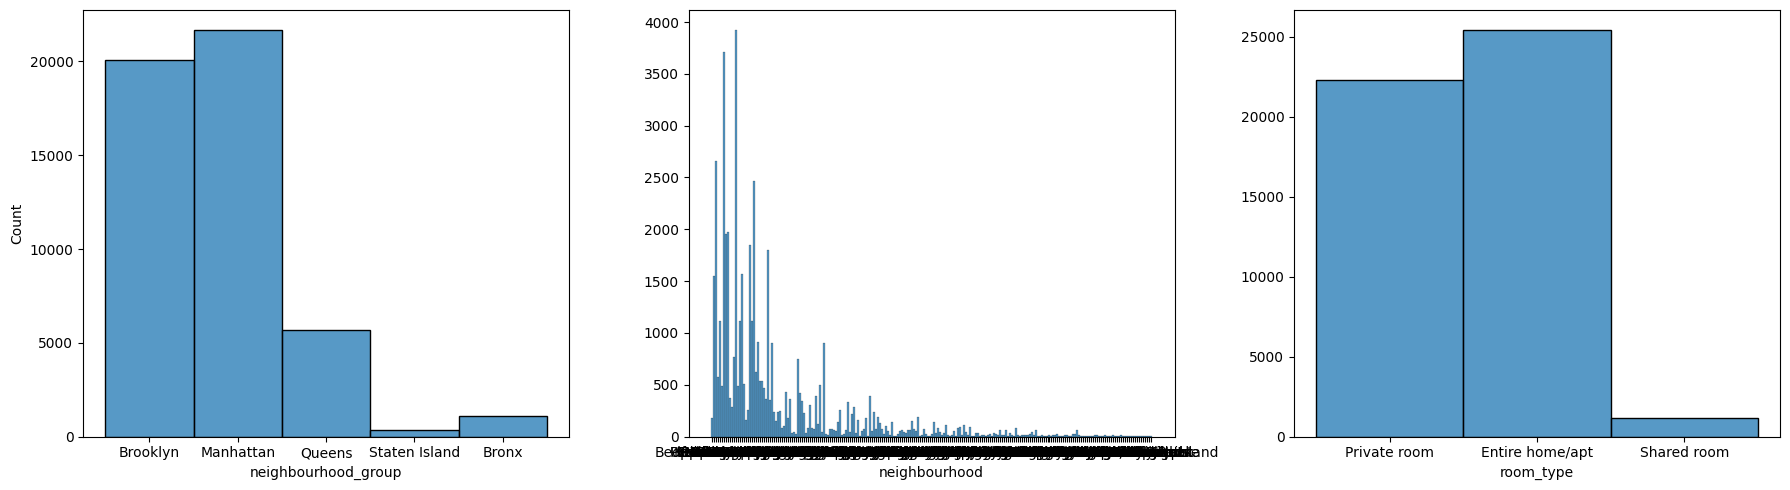

In [49]:
# Creamos la figura de los histogramas
fig, axis = plt.subplots(1, 3, figsize = (18,5))

# Creamos un histograma múltiple de variables categóricas.
sns.histplot(ax = axis[0], data = data_airbnb, x = "neighbourhood_group").set()
sns.histplot(ax = axis[1], data = data_airbnb, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = data_airbnb, x = "room_type").set(ylabel = None)

# Ajustamos el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


- En la primera gráfica de "neighbourhood_group" se aprecia la clara tendencia por los barrios de Brooklyn y Manhattan, mientras que muy por debajo aparecerían Queens, Bronx y Staten Island en orden descendente.
- La segunda gráfica no obtenemos valores de interés por la cantidad de barrios diferentes que aparecen, imposible de mostrar en una gráfica.
- Finalmente la tercerta gráfica "room_type", las opciones de apartamento y habitación privada copan casi la totalidad de alquileres frente a algunos datos de habitación compartida.

#### Análisis sobre variables numéricas.

<Axes: xlabel='availability_365'>

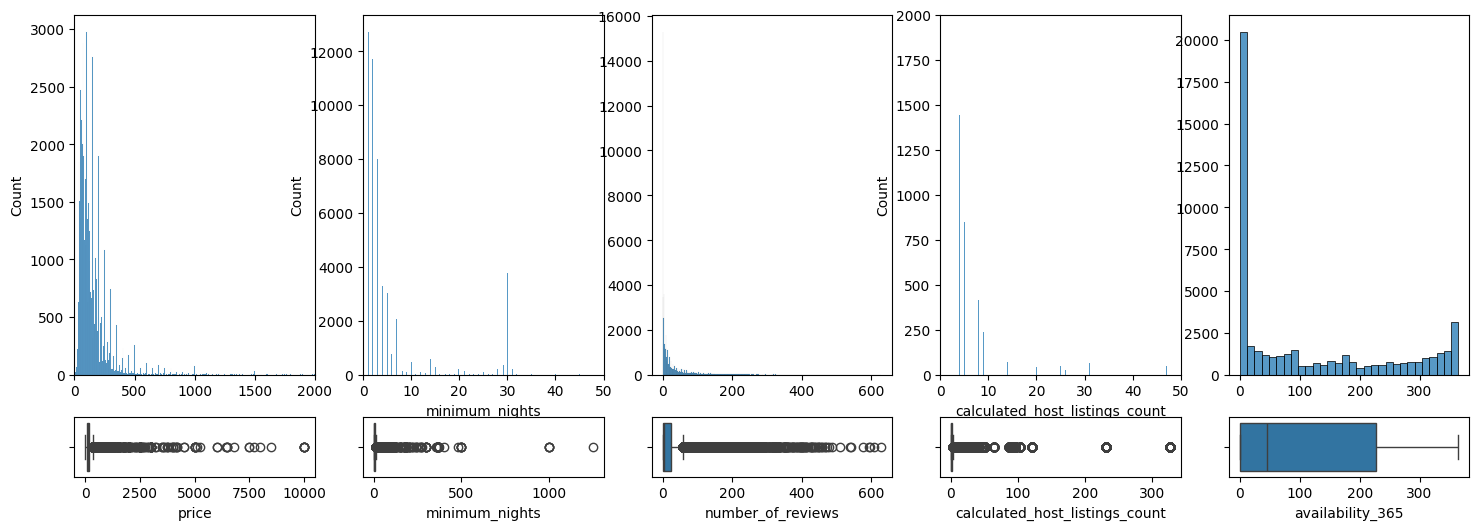

In [50]:
# Creamos la figura de los histogramas y diagramas de caja
fig, axis = plt.subplots(2, 5, figsize = (18, 6), gridspec_kw = {"height_ratios": [6, 1]})

# Creanos los múltiples histogramas y diagramas de caja
sns.histplot(ax = axis[0,0], data = data_airbnb, x = "price").set(xlabel = None,xlim = (0, 2000))
sns.boxplot(ax = axis[1,0], data = data_airbnb, x = "price")
sns.histplot(ax = axis[0,1], data = data_airbnb, x = "minimum_nights").set_xlim(0, 50)
sns.boxplot(ax = axis[1,1], data = data_airbnb, x = "minimum_nights")
sns.histplot(ax = axis[0,2], data = data_airbnb, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,2], data = data_airbnb, x = "number_of_reviews")
sns.histplot(ax = axis[0,3], data = data_airbnb, x = "calculated_host_listings_count").set(xlim = (0, 50), ylim = (0, 2000))
sns.boxplot(ax = axis[1,3], data = data_airbnb, x = "calculated_host_listings_count")
sns.histplot(ax = axis[0,4], data = data_airbnb, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,4], data = data_airbnb, x = "availability_365")



- En la variable "price" vemos que la mayoría de resultados se aglutinan en torno a los valores de 0 a 400.
- En "minimum_nights" tenemos un pico en 30 y los restantes casi todos se encuentran entre 0 y 10.
- "Number_of_reviews" junta casi todos los valores en los primeros 100 dígitos.
- Los resultados de "availability_365" se reparten por toda la gráfica. Salvo la primera parte que abarca una enorme mayoría.

## Paso 4
### Análisis de variables multivariantes
#### Análisis numérico-numérico

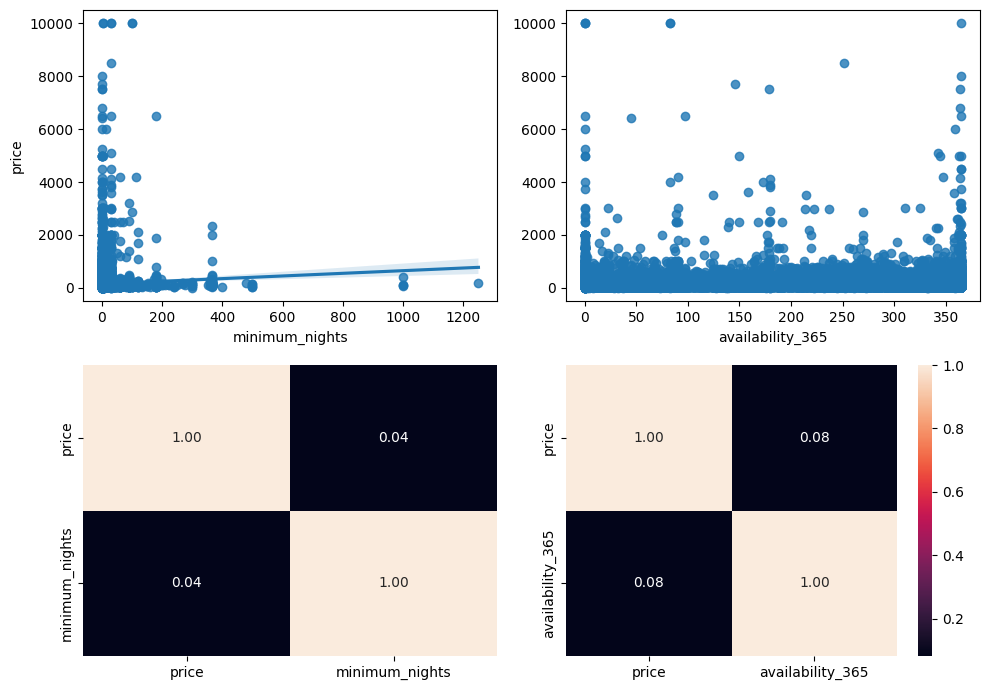

In [51]:
# Creamos la figura para los diagramas
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_airbnb, x = "minimum_nights", y = "price")
sns.heatmap(data_airbnb[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_airbnb, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(data_airbnb[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Como se observa en las gráficas (valores muy por debajo de 1, que sería lo máximo), no existe relación lineal entre la variable objetivo "price" y las variables "minimum_nights" y "availability_365".

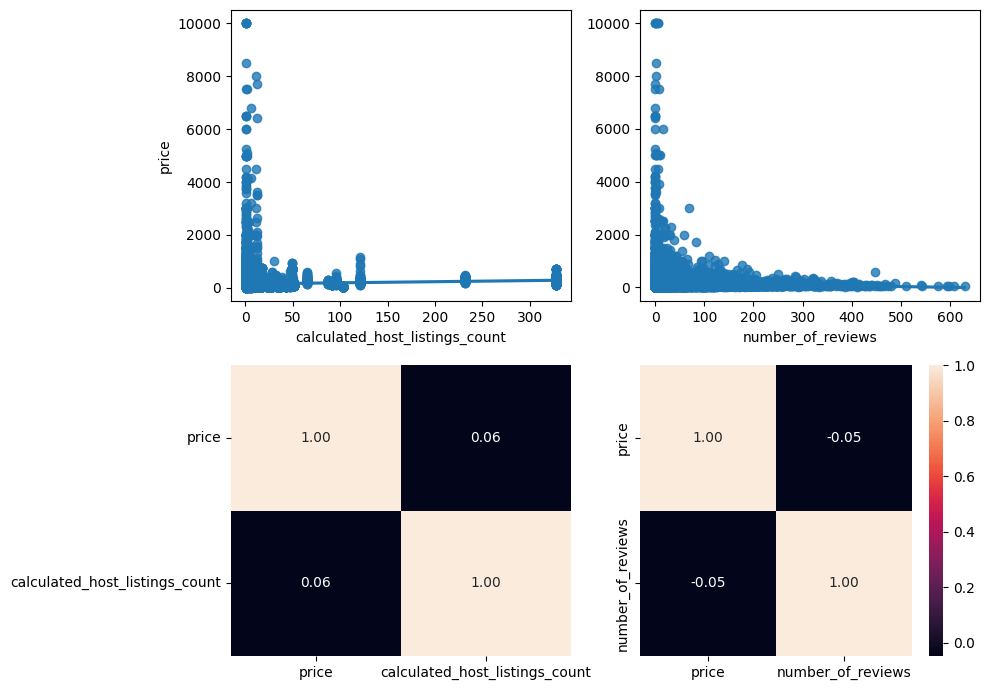

In [52]:
# Creamos la figura para los diagramas
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_airbnb, x = "calculated_host_listings_count", y = "price")
sns.heatmap(data_airbnb[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_airbnb, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(data_airbnb[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Como se observa en las gráficas (valores muy por debajo de 1, que sería lo máximo), no existe relación lineal entre la variable objetivo "price" y las variables "calculated_host_listings_count" y "number_of_reviews".
- Además en la gráfica donde comparamos "number_of_reviews" nos encontramos con una relación inversa (de ahí los valores negativos), es decir muestra una  ligera tendencia: a mayor "price" menor "number_of_reviews".

#### Análisis categórico-categórico

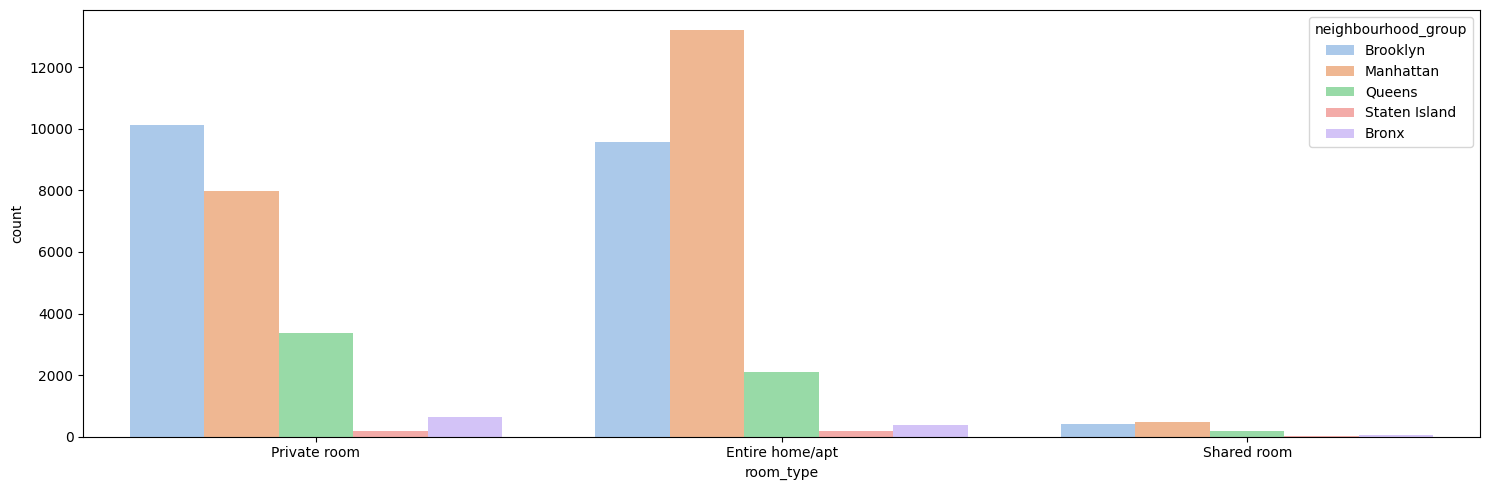

In [53]:
fig, axis = plt.subplots(figsize = (15, 5))

sns.countplot( data = data_airbnb, x = "room_type", hue = "neighbourhood_group", palette = "pastel")

plt.tight_layout()

plt.show()

- La variable objetivo "price" no es categórica, ni una numérica que pueda transformar a categórica. 
- Las únicas variables categóricas que pueden guardar una relación son las usadas en la gráfica.

#### Combinaciones del precio con varias predictoras, en este caso "calculated_host_listings_count" y "availability_365".

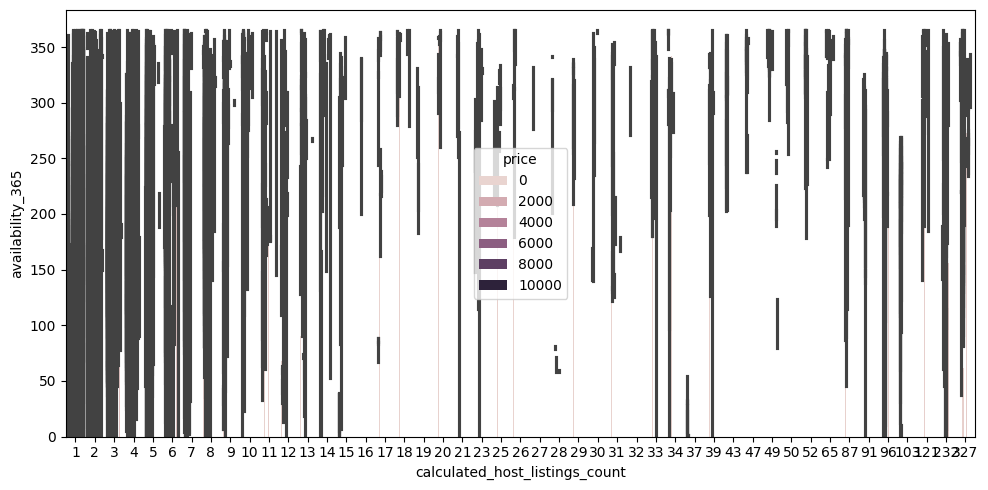

In [54]:
# Crear una figura para el gráfico
fig, axis = plt.subplots(figsize = (10,5))

# Graficar el barplot
sns.barplot( data = data_airbnb, x = "calculated_host_listings_count", y = "availability_365", hue = "price")

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()




 Esta gráfica la mantengo solo a modo de ejemplo.

#### Análisis de correlaciones

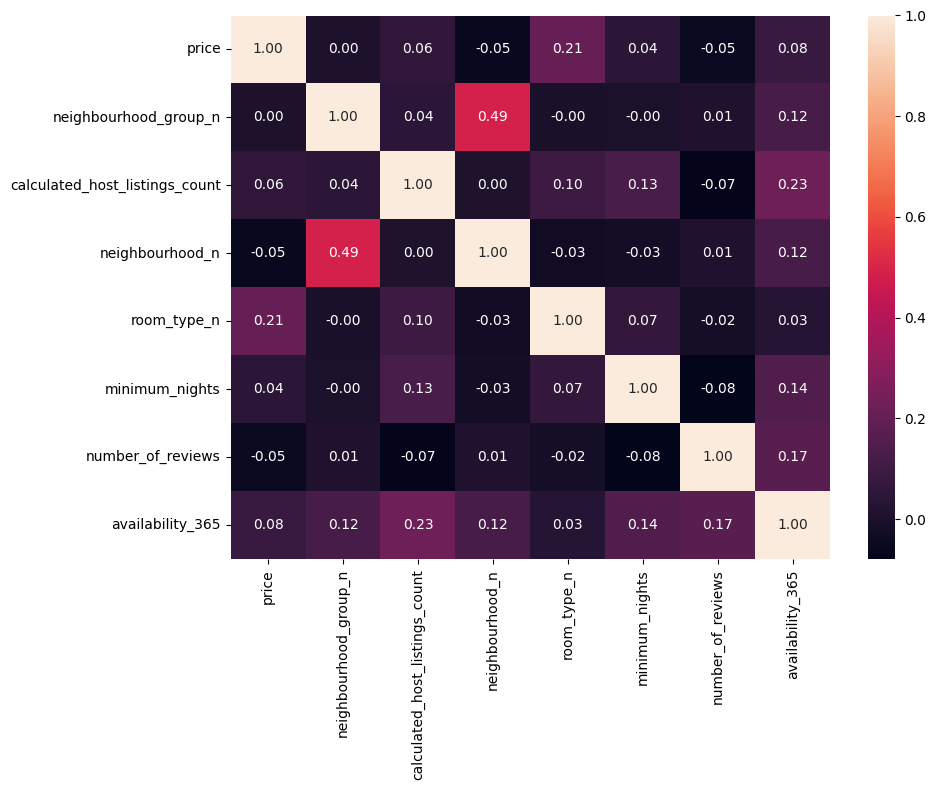

In [55]:
# Factorizamos las variables categóricas
data_airbnb["neighbourhood_group_n"] = pd.factorize(data_airbnb["neighbourhood_group"])[0]
data_airbnb["room_type_n"] = pd.factorize(data_airbnb["room_type"])[0]
data_airbnb["neighbourhood_n"] = pd.factorize(data_airbnb["neighbourhood"])[0]

# Creamos la figura del gráfico
fig, axis = plt.subplots(figsize = (10, 8))

# Graficamos todas las variables numéricas y las que transformamos a numéricas en el paso anterior (factorizar)
sns.heatmap(data_airbnb[["price", "neighbourhood_group_n", "calculated_host_listings_count", "neighbourhood_n", "room_type_n", "minimum_nights", "number_of_reviews", "availability_365"]].corr(), annot = True, fmt = ".2f")

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

- Las varibles "neighbourhood" y "neighbourhood_group" están estrechamente relacionadas.
- También las variables "calculated_host_listings_count" y "availability_365" guardan una relación.
- En el gráfico se observa una relación entre "price" y "room type_n".


#### Representación de un gráfico de pares que muestra la relación entre varias variables en un conjunto de datos. Mostrando todas las combinaciones posibles de variables numéricas.

In [56]:

data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   room_type                       48895 non-null  object
 3   price                           48895 non-null  int64 
 4   minimum_nights                  48895 non-null  int64 
 5   number_of_reviews               48895 non-null  int64 
 6   calculated_host_listings_count  48895 non-null  int64 
 7   availability_365                48895 non-null  int64 
 8   neighbourhood_group_n           48895 non-null  int64 
 9   room_type_n                     48895 non-null  int64 
 10  neighbourhood_n                 48895 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.1+ MB


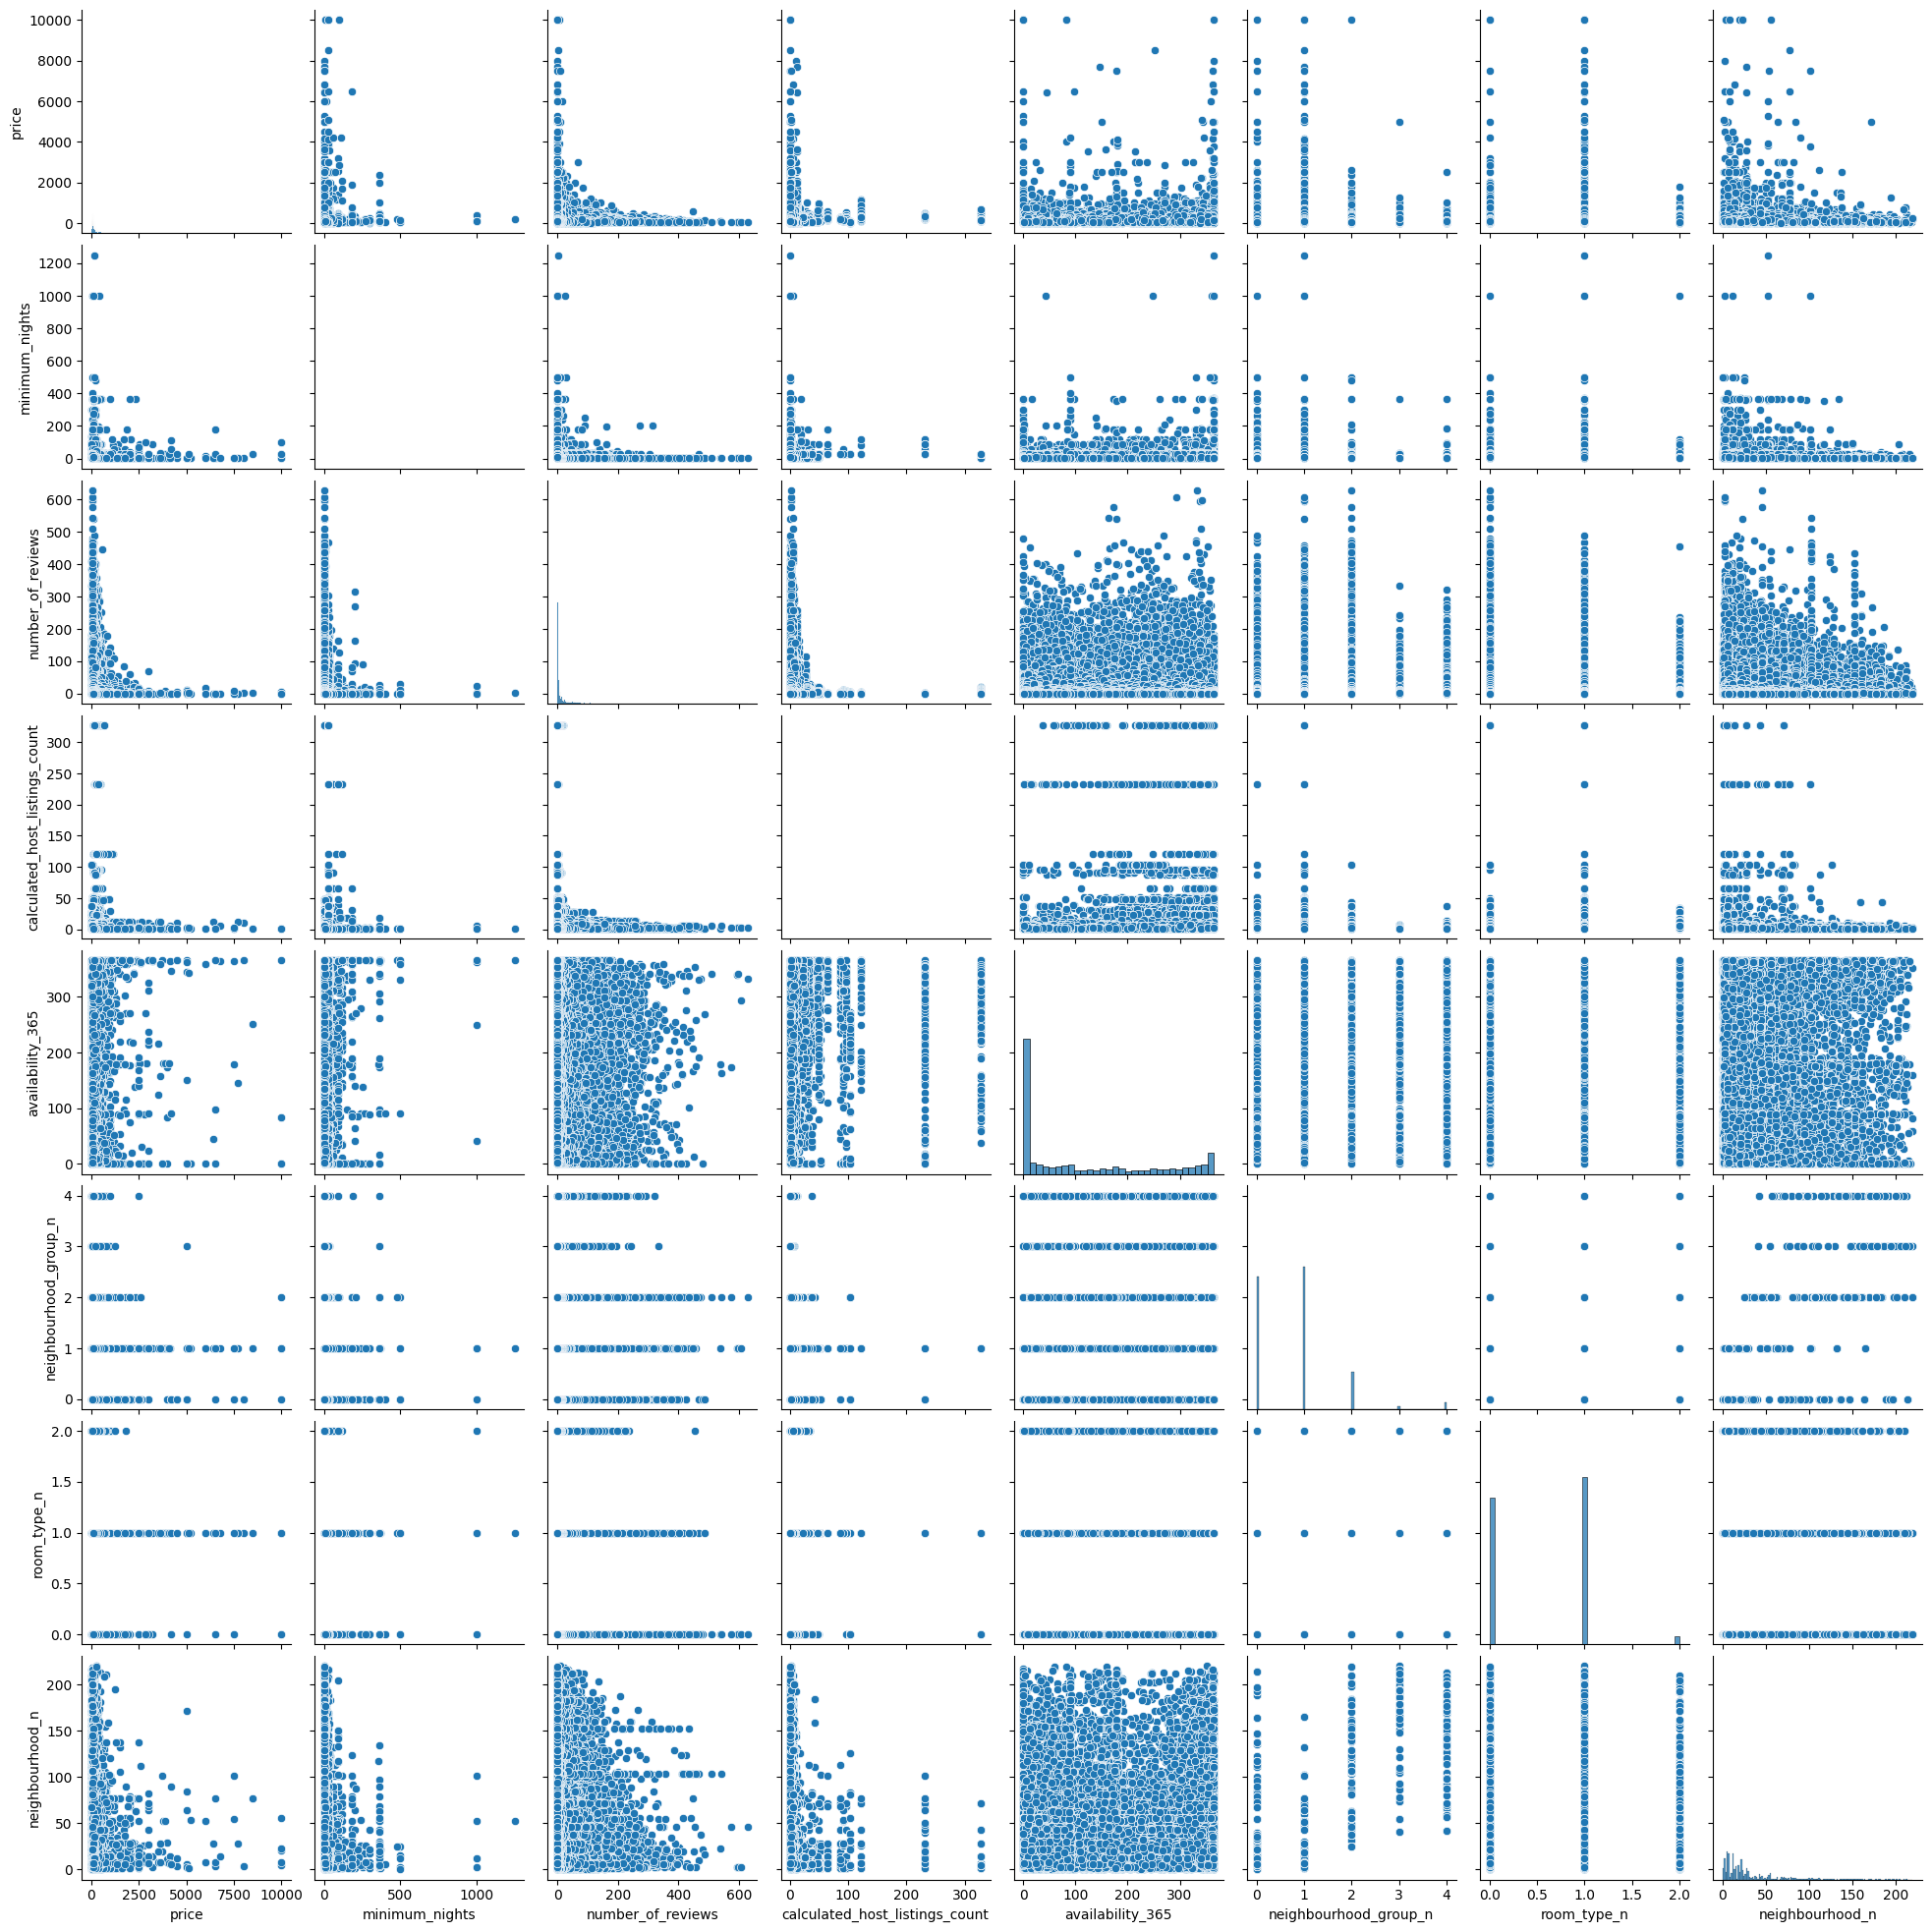

In [57]:
# Graficamos todas las variables entre ellas
sns.pairplot(data = data_airbnb)

## Paso 5
### Ingeniería de características
#### Análisis de outlaiers

In [58]:
# Análisis descriptivo básico con la función describe()
data_airbnb.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327,0.786911,0.567113,29.888782
std,240.154170,20.510550,44.550582,32.952519,131.622289,0.844386,0.541249,34.676634
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,2.000000,220.000000


- El valor máximo de la variable "price" parece desviarse mucho con respecto a la media de la variable.
- 

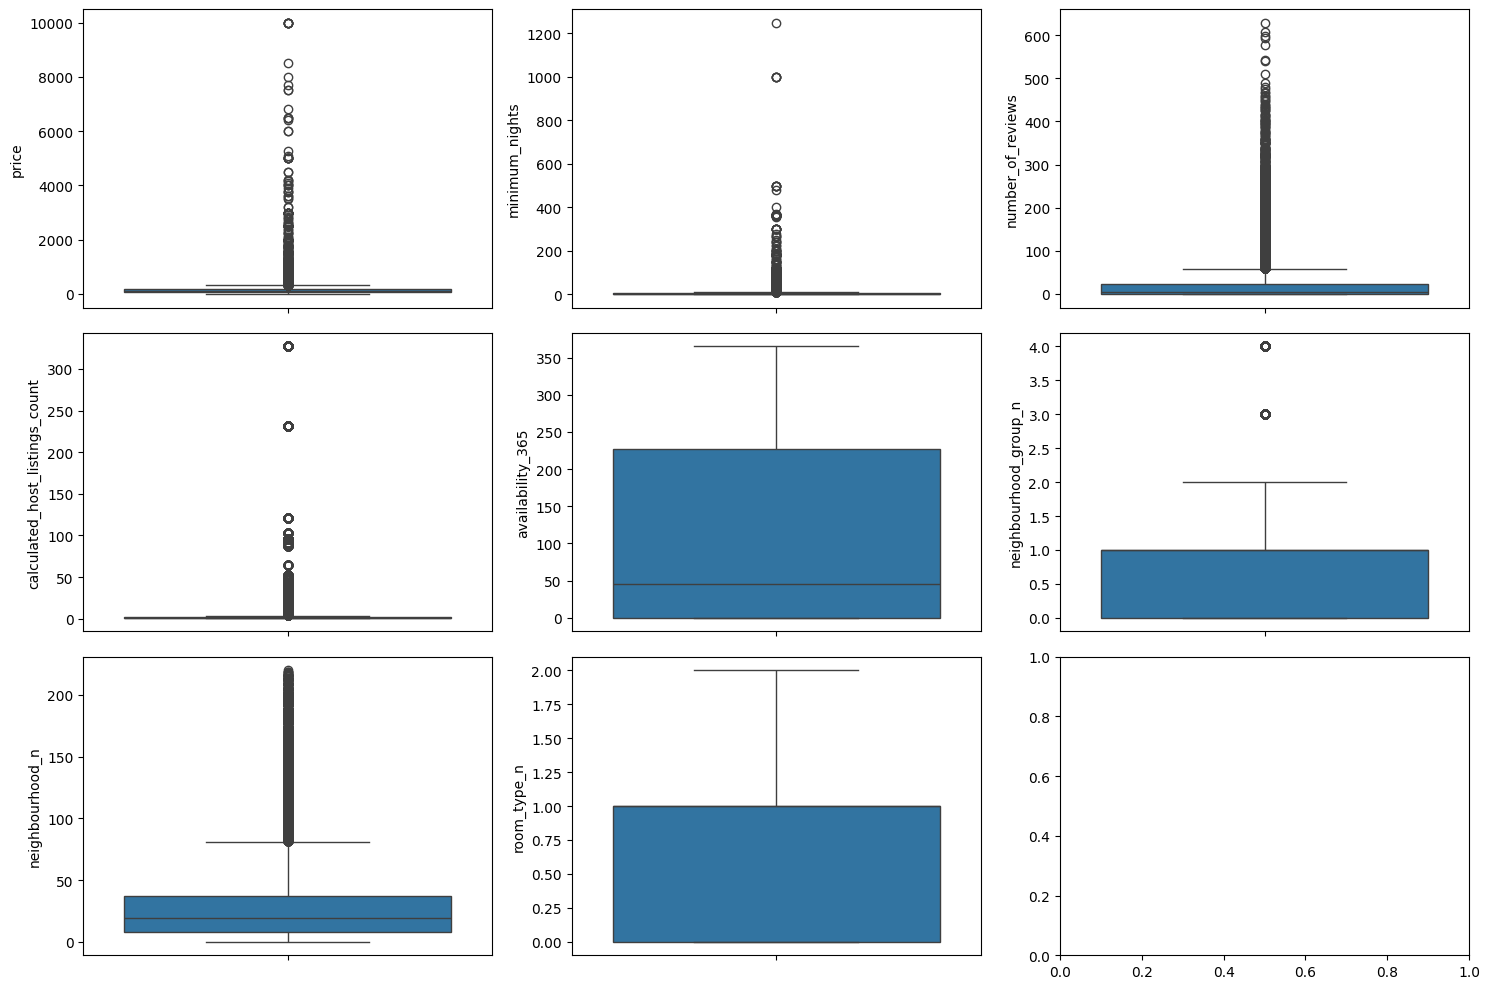

In [59]:
# Representamos en diagramas de cajas para ver de forma más clara los valores atípicos.

fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data_airbnb, y = "price")
sns.boxplot(ax = axis[0, 1], data = data_airbnb, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = data_airbnb, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = data_airbnb, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 1], data = data_airbnb, y = "availability_365")
sns.boxplot(ax = axis[1, 2], data = data_airbnb, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[2, 0], data = data_airbnb, y = "neighbourhood_n")
sns.boxplot(ax = axis[2, 1], data = data_airbnb, y = "room_type_n")





plt.tight_layout()

plt.show()

Ahora examinamos cada gráfica que contenga outlaiers y decidimos si eliminarlos, sustituirlos (media, valor máximo, valor mínimo) o mantenerlos:

In [60]:
minimum_nights_stats = data_airbnb["minimum_nights"].describe()
minimum_nights_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [61]:
fare_iqr = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]
upper_limit = minimum_nights_stats["75%"] + 1.5 * fare_iqr
lower_limit = minimum_nights_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.0 y -5.0, con un rango intercuartílico de 4.0


In [65]:
data_airbnb[data_airbnb["minimum_nights"] > 900]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
13404,Manhattan,Harlem,Entire home/apt,99,999,2,1,42,1,1,2
26341,Brooklyn,Williamsburg,Private room,79,999,24,6,249,0,0,12
38664,Manhattan,Greenwich Village,Shared room,110,999,0,1,365,1,2,52


In [66]:
# Eliminamos los valores de "minimum_nights" superiores a 999.
data_airbnb = data_airbnb[data_airbnb["minimum_nights"] <= 999]


Aunque los valores allados en la búsqueda de outlaiers era 11.0 y -5.0, con un rango intercuartílico de 4.0, viendo la gráfica decidimos eliminar valores superiores a 999.

#### A PRIORI NO DEBEMOS ELIMINAR VALORES NUNCA. (SI EL CLIENTE NOS ENTREGA UN DATAFRAME CON 10000 FILAS QUIERE QUE LE DEVUELVAS LAS 10000 FILAS Y HACIENDO ESTO ELIMINAMOS VARIAS FILAS).
#### DEBEMOS PROCEDER CON MEDIDAS MÁS CAUTAS COMO SUSTITUIR POR VALORES MEDIA O POR UPPER_LIMIT Y LOWER_LIMIT LOS VALORES OUTLAIER
#### O SENCILLAMENTE MANTENER LOS DATOS

In [67]:
number_of_reviews_stats = data_airbnb["number_of_reviews"].describe()
number_of_reviews_stats


count    48893.000000
mean        23.275377
std         44.551265
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [68]:
fare_iqr = number_of_reviews_stats["75%"] - number_of_reviews_stats["25%"]
upper_limit = number_of_reviews_stats["75%"] + 1.5 * fare_iqr
lower_limit = number_of_reviews_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 58.5 y -33.5, con un rango intercuartílico de 23.0


In [69]:
# Calculamos los valores máximos y mínimos para la variable
upper_number_of_reviews = data_airbnb[data_airbnb["number_of_reviews"] > 58.5]
lower_number_of_reviews = data_airbnb[data_airbnb["number_of_reviews"] < -33.5]

print(upper_number_of_reviews)
print(lower_number_of_reviews)

      neighbourhood_group     neighbourhood        room_type  price  \
3                Brooklyn      Clinton Hill  Entire home/apt     89   
5               Manhattan       Murray Hill  Entire home/apt    200   
7               Manhattan    Hell's Kitchen     Private room     79   
8               Manhattan   Upper West Side     Private room     79   
9               Manhattan         Chinatown  Entire home/apt    150   
...                   ...               ...              ...    ...   
40104              Queens           Jamaica      Shared room     40   
40297              Queens           Jamaica     Private room     67   
40424              Queens           Jamaica      Shared room     39   
42075           Manhattan  Theater District     Private room    100   
42076           Manhattan  Theater District     Private room    199   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
3                   1                270                               

Con esto nos damos cuenta de que hay demasiados valores por encima y debajo de los valores máximo y mínimo como para modificarlos

In [70]:
data_airbnb["number_of_reviews"]

0          9
1         45
2          0
3        270
4          9
        ... 
48890      0
48891      0
48892      0
48893      0
48894      0
Name: number_of_reviews, Length: 48893, dtype: int64

In [71]:
# Sustituímos los valores outlair de la variable "number_of_reviews" por sus respectivos límites superiores e inferiores.
'''
data_airbnb["number_of_reviews"] = data_airbnb["number_of_reviews"].apply(lambda x: 58.5 if x in upper_number_of_reviews else x)
data_airbnb["number_of_reviews"] = data_airbnb["number_of_reviews"].apply(lambda x: -33.5 if x in lower_number_of_reviews else x)


number_of_reviews_st = data_airbnb["number_of_reviews"].describe()

number_of_reviews_st
'''
# EN ESTE CASO NO MODIFICAMOS ESTOS VALORES

'\ndata_airbnb["number_of_reviews"] = data_airbnb["number_of_reviews"].apply(lambda x: 58.5 if x in upper_number_of_reviews else x)\ndata_airbnb["number_of_reviews"] = data_airbnb["number_of_reviews"].apply(lambda x: -33.5 if x in lower_number_of_reviews else x)\n\n\nnumber_of_reviews_st = data_airbnb["number_of_reviews"].describe()\n\nnumber_of_reviews_st\n'

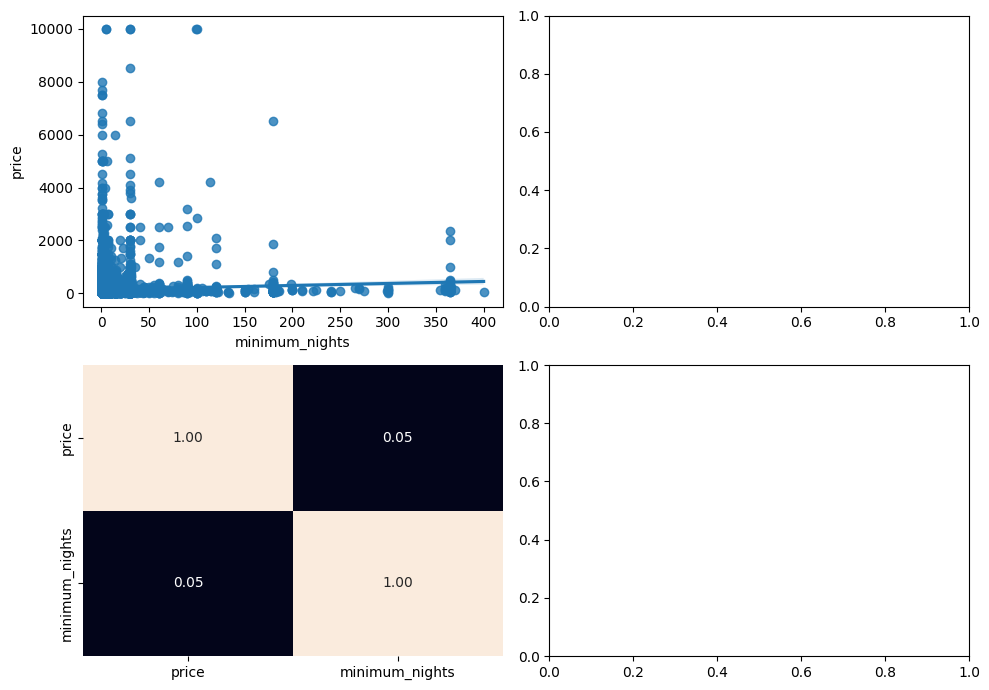

In [28]:
# grafica de dispersión entre minimun_nights y price

filtro = data_airbnb[data_airbnb["minimum_nights"] <= 400]


fig, axis = plt.subplots(2, 2, figsize = (10, 7))
sns.regplot(ax = axis[0, 0], data = filtro, x = "minimum_nights", y = "price")
sns.heatmap(filtro[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
plt.tight_layout()
plt.show()


#### ESTA GRÁFICA SERÍA UN EJEMPLO DE AYUDA CUANDO DUDAMOS DE ELIMINAR OUTLAIERS

#### Análisis de valores faltantes

In [72]:
data_airbnb.isnull().sum().sort_values(ascending=False)


neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
room_type_n                       0
neighbourhood_n                   0
dtype: int64

No existen valores faltantes en nuestro data

##### Inferencia de nuevas características

En el data que nos ocupa no existe la posibilidad de fusionar 2 variables que resulten similares.

#### Escalado de valores

In [73]:
num_variables = ["neighbourhood_n", "room_type_n", "neighbourhood_group_n", "availability_365", "calculated_host_listings_count", "number_of_reviews", "minimum_nights"]

Dividimos el conjunto de datos en muestras de train y test

In [74]:
x = data_airbnb.drop("price", axis = 1)[num_variables]
y = data_airbnb["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.head()

,neighbourhood_n,room_type_n,neighbourhood_group_n,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights
23258,197,1,0,160,1,51,2
31362,28,0,1,34,1,0,15
40121,85,0,2,6,4,7,2
18055,99,0,4,364,1,8,1
31120,1,1,1,13,1,1,3


Ahora si empezamos con el escalado propiamente, podemos decidir hacerlo por normalización o por escalado mínimo-máximo, según el modelo que vayamos a entrenar. En este caso usaremos la normalización

In [75]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, index = x_train.index, columns = num_variables)

x_test_norm = scaler.transform(x_test)
X_test_norm = pd.DataFrame(x_test_norm, index = x_test.index, columns = num_variables)

x_train_norm.head()




,neighbourhood_n,room_type_n,neighbourhood_group_n,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights
23258,4.838322,0.801734,-0.932012,0.365339,-0.186191,0.625777,-0.255939
31362,-0.051020,-1.047157,0.252968,-0.594795,-0.186191,-0.522771,0.410966
40121,1.598048,-1.047157,1.437948,-0.808158,-0.094554,-0.365127,-0.255939
18055,2.003082,-1.047157,3.807908,1.919841,-0.186191,-0.342607,-0.307240
31120,-0.832158,0.801734,0.252968,-0.754818,-0.186191,-0.500251,-0.204639


## Paso 6
### Selección de características


In [ ]:
# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()